In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pandas_datareader as pdr
from pandas_profiling import ProfileReport

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

import seaborn as sns
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm

import pandas_datareader
import datetime
import pandas_datareader.data as web



# set data_date limit
start = datetime.datetime(2017,1,1)
end = datetime.datetime.today()


In [3]:
# Get three stock data as Tesla,GS,JPMC
tesla = web.DataReader('TSLA', 'yahoo', start, end)
gs = web.DataReader('GS', 'yahoo', start, end)
jpmc = web.DataReader('JPM', 'yahoo', start, end)


In [4]:
gs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,244.970001,237.970001,242.699997,241.570007,4384200.0,218.627548
2017-01-04,243.320007,240.029999,241.440002,243.130005,2728700.0,220.039413
2017-01-05,243.229996,236.779999,242.720001,241.320007,3562600.0,218.401276
2017-01-06,246.199997,241.369995,242.289993,244.899994,3591100.0,221.641266
2017-01-09,244.690002,241.470001,243.250000,242.889999,3022800.0,219.822189
...,...,...,...,...,...,...
2022-08-15,358.619995,349.049988,351.000000,355.850006,2045700.0,355.850006
2022-08-16,356.470001,352.019989,352.989990,354.970001,1740900.0,354.970001
2022-08-17,355.589996,350.769989,351.899994,353.739990,1576300.0,353.739990


In [5]:
# Important lib need to make RNN(LSTM)

import keras
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

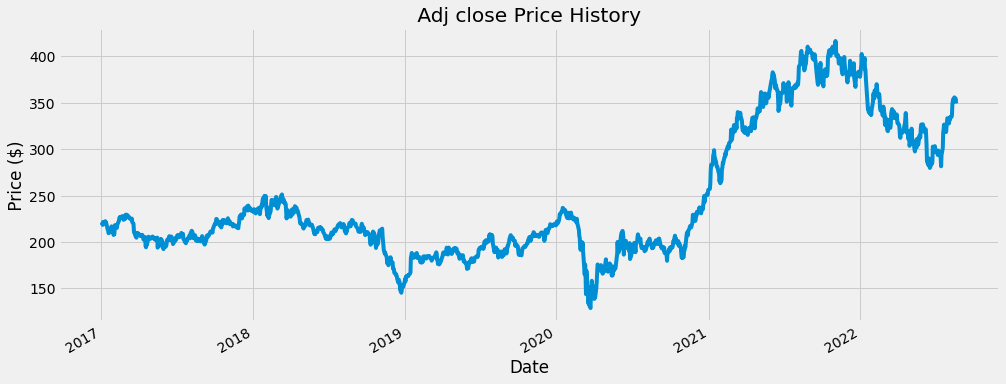

In [6]:
# close price history plot
gs['Adj Close'].plot(title= ' Adj close Price History ',ylabel = ' Price ($) ',figsize=(15,6));

# Create train_dataset

In [7]:
from datetime import datetime,timedelta
train_data_end = datetime(2021,12,31)
test_data_end = datetime(2022,8,1)

In [8]:
train_data =gs[:train_data_end]
test_data = gs[train_data_end + timedelta(days=1):test_data_end]

In [9]:
train_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,244.970001,237.970001,242.699997,241.570007,4384200.0,218.627548
2017-01-04,243.320007,240.029999,241.440002,243.130005,2728700.0,220.039413
2017-01-05,243.229996,236.779999,242.720001,241.320007,3562600.0,218.401276
2017-01-06,246.199997,241.369995,242.289993,244.899994,3591100.0,221.641266
2017-01-09,244.690002,241.470001,243.250000,242.889999,3022800.0,219.822189
...,...,...,...,...,...,...
2021-12-27,389.109985,385.000000,386.989990,388.040009,1430400.0,383.417969
2021-12-28,391.329987,386.239990,388.929993,387.609985,1528200.0,382.993073
2021-12-29,389.459991,384.420013,387.970001,386.200012,1327800.0,381.599915


In [10]:
train_data.reset_index(inplace = True)
train_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,244.970001,237.970001,242.699997,241.570007,4384200.0,218.627548
1,2017-01-04,243.320007,240.029999,241.440002,243.130005,2728700.0,220.039413
2,2017-01-05,243.229996,236.779999,242.720001,241.320007,3562600.0,218.401276
3,2017-01-06,246.199997,241.369995,242.289993,244.899994,3591100.0,221.641266
4,2017-01-09,244.690002,241.470001,243.250000,242.889999,3022800.0,219.822189
...,...,...,...,...,...,...,...
1254,2021-12-27,389.109985,385.000000,386.989990,388.040009,1430400.0,383.417969
1255,2021-12-28,391.329987,386.239990,388.929993,387.609985,1528200.0,382.993073
1256,2021-12-29,389.459991,384.420013,387.970001,386.200012,1327800.0,381.599915
1257,2021-12-30,389.779999,385.200012,387.750000,385.519989,1160100.0,380.927948


In [11]:
train_data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
train_data.drop('Date',inplace=True,axis=1)
train_data

,High,Low,Open,Close,Volume,Adj Close
0,244.970001,237.970001,242.699997,241.570007,4384200.0,218.627548
1,243.320007,240.029999,241.440002,243.130005,2728700.0,220.039413
2,243.229996,236.779999,242.720001,241.320007,3562600.0,218.401276
3,246.199997,241.369995,242.289993,244.899994,3591100.0,221.641266
4,244.690002,241.470001,243.250000,242.889999,3022800.0,219.822189
...,...,...,...,...,...,...
1254,389.109985,385.000000,386.989990,388.040009,1430400.0,383.417969
1255,391.329987,386.239990,388.929993,387.609985,1528200.0,382.993073
1256,389.459991,384.420013,387.970001,386.200012,1327800.0,381.599915
1257,389.779999,385.200012,387.750000,385.519989,1160100.0,380.927948


In [13]:
test_data.reset_index(inplace=True)
test_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2022-01-03,399.299988,387.339996,389.000000,395.329987,3334300.0,390.621094
1,2022-01-04,410.279999,401.179993,402.230011,407.480011,3916400.0,402.626404
2,2022-01-05,412.660004,397.890015,409.799988,398.630005,3469600.0,393.881836
3,2022-01-06,401.200012,386.429993,401.000000,396.929993,2960900.0,392.202057
4,2022-01-07,400.549988,394.529999,397.670013,397.510010,2360700.0,392.775177
...,...,...,...,...,...,...,...
140,2022-07-26,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988
141,2022-07-27,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009
142,2022-07-28,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985
143,2022-07-29,335.179993,329.500000,329.500000,333.390015,2112200.0,333.390015


In [14]:
test_data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [16]:
train_data.shape

(1259, 6)

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data

array([[0.36250087, 0.37863629, 0.37155596, 0.36901137, 0.26594914,
        0.31220626],
       [0.35669553, 0.38591775, 0.36716711, 0.37441153, 0.15353275,
        0.31711127],
       [0.35637884, 0.37443   , 0.37162564, 0.36814596, 0.21015856,
        0.31142016],
       ...,
       [0.87087463, 0.89629212, 0.87756455, 0.86966909, 0.05840492,
        0.87839469],
       [0.87200055, 0.89904918, 0.87679823, 0.86731509, 0.04701728,
        0.87606018],
       [0.8622194 , 0.88363786, 0.86721935, 0.857034  , 0.07697688,
        0.86586487]])

In [18]:
train_data.shape

(1259, 6)

In [19]:
# Splitting Train data
x_train = []
y_train = []

for i in range(60,train_data.shape[0]):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i,5])
    

In [20]:
X_train = np.array(x_train)
y_train = np.array(y_train)

In [21]:
X_train.shape ,y_train.shape

((1199, 60, 6), (1199,))

In [22]:
print(X_train)

[[[0.36250087 0.37863629 0.37155596 0.36901137 0.26594914 0.31220626]
  [0.35669553 0.38591775 0.36716711 0.37441153 0.15353275 0.31711127]
  [0.35637884 0.37443    0.37162564 0.36814596 0.21015856 0.31142016]
  ...
  [0.29952151 0.31812237 0.30398135 0.31331346 0.59261196 0.26346931]
  [0.3089508  0.33314481 0.3119231  0.32664082 0.27185686 0.27560605]
  [0.30972486 0.34169876 0.3251942  0.32359455 0.14723797 0.27283187]]

 [[0.35669553 0.38591775 0.36716711 0.37441153 0.15353275 0.31711127]
  [0.35637884 0.37443    0.37162564 0.36814596 0.21015856 0.31142016]
  [0.36682849 0.39065423 0.37012782 0.3805386  0.21209384 0.32267633]
  ...
  [0.3089508  0.33314481 0.3119231  0.32664082 0.27185686 0.27560605]
  [0.30972486 0.34169876 0.3251942  0.32359455 0.14723797 0.27283187]
  [0.31686721 0.34827329 0.32550767 0.33318332 0.18260279 0.28156413]]

 [[0.35637884 0.37443    0.37162564 0.36814596 0.21015856 0.31142016]
  [0.36682849 0.39065423 0.37012782 0.3805386  0.21209384 0.32267633]
  [0

In [23]:
y_train

array([0.28156413, 0.27683548, 0.2744398 , ..., 0.87839469, 0.87606018,
       0.86586487])

# make LSTM

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [25]:
regressor = Sequential()

In [26]:
regressor = Sequential()

regressor.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],6)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80,activation='relu',return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=120,activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [27]:
# Improving our model by adjusting Droupout values

regressor = Sequential()

regressor.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],6)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=70,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=120,activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            16080     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 70)            36680     
                                                                 
 dropout_5 (Dropout)         (None, 60, 70)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            48320     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [28]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [29]:

regressor.fit(X_train,y_train, epochs=80, batch_size=32)

Epoch 1/80
38/38 [==============================] - 7s 103ms/step - loss: 0.0393
Epoch 2/80
38/38 [==============================] - 4s 100ms/step - loss: 0.0067
Epoch 3/80
38/38 [==============================] - 4s 97ms/step - loss: 0.0052
Epoch 4/80
38/38 [==============================] - 3s 88ms/step - loss: 0.0048
Epoch 5/80
38/38 [==============================] - 6s 160ms/step - loss: 0.0040
Epoch 6/80
38/38 [==============================] - 4s 99ms/step - loss: 0.0041
Epoch 7/80
38/38 [==============================] - 3s 92ms/step - loss: 0.0036
Epoch 8/80
38/38 [==============================] - 4s 93ms/step - loss: 0.0032
Epoch 9/80
38/38 [==============================] - 4s 94ms/step - loss: 0.0033
Epoch 10/80
38/38 [==============================] - 3s 90ms/step - loss: 0.0033
Epoch 11/80
38/38 [==============================] - 4s 92ms/step - loss: 0.0031
Epoch 12/80
38/38 [==============================] - 4s 93ms/step - loss: 0.0033
Epoch 13/80
38/38 [===============

# make test_dataset

In [30]:
test_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2022-01-03,399.299988,387.339996,389.000000,395.329987,3334300.0,390.621094
1,2022-01-04,410.279999,401.179993,402.230011,407.480011,3916400.0,402.626404
2,2022-01-05,412.660004,397.890015,409.799988,398.630005,3469600.0,393.881836
3,2022-01-06,401.200012,386.429993,401.000000,396.929993,2960900.0,392.202057
4,2022-01-07,400.549988,394.529999,397.670013,397.510010,2360700.0,392.775177
...,...,...,...,...,...,...,...
140,2022-07-26,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988
141,2022-07-27,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009
142,2022-07-28,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985
143,2022-07-29,335.179993,329.500000,329.500000,333.390015,2112200.0,333.390015


In [31]:
from datetime import datetime,timedelta
train_data_end = datetime(2021,12,31)
test_data_end = datetime(2022,8,1)

In [32]:
data_train =gs[:train_data_end]
test_data = gs[train_data_end + timedelta(days=1):test_data_end]

In [33]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,399.299988,387.339996,389.000000,395.329987,3334300.0,390.621094
2022-01-04,410.279999,401.179993,402.230011,407.480011,3916400.0,402.626404
2022-01-05,412.660004,397.890015,409.799988,398.630005,3469600.0,393.881836
2022-01-06,401.200012,386.429993,401.000000,396.929993,2960900.0,392.202057
2022-01-07,400.549988,394.529999,397.670013,397.510010,2360700.0,392.775177
...,...,...,...,...,...,...
2022-07-26,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988
2022-07-27,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009
2022-07-28,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985


In [34]:
test_data.reset_index(inplace=True)

In [35]:
test_data.drop('Date',inplace=True,axis=1)
test_data

,High,Low,Open,Close,Volume,Adj Close
0,399.299988,387.339996,389.000000,395.329987,3334300.0,390.621094
1,410.279999,401.179993,402.230011,407.480011,3916400.0,402.626404
2,412.660004,397.890015,409.799988,398.630005,3469600.0,393.881836
3,401.200012,386.429993,401.000000,396.929993,2960900.0,392.202057
4,400.549988,394.529999,397.670013,397.510010,2360700.0,392.775177
...,...,...,...,...,...,...
140,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988
141,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009
142,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985
143,335.179993,329.500000,329.500000,333.390015,2112200.0,333.390015


In [36]:
data_train.reset_index(inplace= True)
data_train

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,244.970001,237.970001,242.699997,241.570007,4384200.0,218.627548
1,2017-01-04,243.320007,240.029999,241.440002,243.130005,2728700.0,220.039413
2,2017-01-05,243.229996,236.779999,242.720001,241.320007,3562600.0,218.401276
3,2017-01-06,246.199997,241.369995,242.289993,244.899994,3591100.0,221.641266
4,2017-01-09,244.690002,241.470001,243.250000,242.889999,3022800.0,219.822189
...,...,...,...,...,...,...,...
1254,2021-12-27,389.109985,385.000000,386.989990,388.040009,1430400.0,383.417969
1255,2021-12-28,391.329987,386.239990,388.929993,387.609985,1528200.0,382.993073
1256,2021-12-29,389.459991,384.420013,387.970001,386.200012,1327800.0,381.599915
1257,2021-12-30,389.779999,385.200012,387.750000,385.519989,1160100.0,380.927948


In [37]:
data_train.drop('Date',inplace=True,axis=1)
data_train.tail(60)

,High,Low,Open,Close,Volume,Adj Close
1199,397.850006,389.760010,392.910004,390.619995,2348000.0,383.941101
1200,394.309998,388.179993,390.829987,392.809998,1446700.0,386.093628
1201,396.950012,385.019989,392.899994,385.239990,1787400.0,378.653076
1202,388.589996,381.019989,386.220001,386.529999,2088200.0,379.921021
1203,388.380005,378.630005,388.000000,386.309998,2391600.0,379.704773
1204,393.660004,382.200012,392.000000,391.200012,3380900.0,384.511169
1205,407.269989,396.339996,402.309998,406.070007,6451400.0,399.126953
1206,415.940002,407.600006,408.010010,413.690002,3832300.0,406.616638
1207,415.850006,409.690002,415.179993,412.160004,2568300.0,405.112823
1208,414.329987,406.200012,411.000000,407.890015,2453400.0,400.915833


In [38]:
past_60days_data = data_train.tail(60)

In [39]:
df = past_60days_data.append(test_data,ignore_index=True)

In [40]:
df

,High,Low,Open,Close,Volume,Adj Close
0,397.850006,389.760010,392.910004,390.619995,2348000.0,383.941101
1,394.309998,388.179993,390.829987,392.809998,1446700.0,386.093628
2,396.950012,385.019989,392.899994,385.239990,1787400.0,378.653076
3,388.589996,381.019989,386.220001,386.529999,2088200.0,379.921021
4,388.380005,378.630005,388.000000,386.309998,2391600.0,379.704773
...,...,...,...,...,...,...
200,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988
201,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009
202,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985
203,335.179993,329.500000,329.500000,333.390015,2112200.0,333.390015


In [41]:
in_put = scaler.transform(df)
in_put

array([[0.90039407, 0.91516737, 0.8947717 , 0.8849695 , 0.12768139,
        0.88652829],
       [0.8879389 , 0.90958249, 0.88752653, 0.89255051, 0.0664788 ,
        0.89400647],
       [0.89722753, 0.89841285, 0.89473684, 0.86634583, 0.08961396,
        0.86815697],
       ...,
       [0.6616002 , 0.67526777, 0.65927058, 0.67204369, 0.09187519,
        0.69603745],
       [0.67989582, 0.70216674, 0.67390018, 0.68685963, 0.11166944,
        0.71090686],
       [0.67855881, 0.70043477, 0.68166782, 0.68232478, 0.06850236,
        0.70635564]])

In [42]:
in_put.shape

(205, 6)

In [43]:
x_test=[]
y_test=[]

for i in range(60,in_put.shape[0]):
    x_test.append([in_put[i-60:i]])
    y_test.append(in_put[i,5])

In [44]:

x_test = np.array(x_test)
y_test = np.array(y_test)

In [45]:
x_test.shape , y_test.shape

((145, 1, 60, 6), (145,))

In [46]:
x_test =x_test.reshape(145,60,6)

In [47]:
x_test.shape,y_test.shape

((145, 60, 6), (145,))

In [48]:
y_pred = regressor.predict(x_test)

5/5 [==============================] - 1s 27ms/step


In [49]:
scaler.scale_

array([3.51840122e-03, 3.53469297e-03, 3.48322830e-03, 3.46164492e-03,
       6.79047975e-08, 3.47413762e-03])

In [50]:
# now doing reverse scaling
scale = 1/3.51840122e-03
scale

284.22000149260975

In [51]:
y_pred = y_pred*scale
y_test = y_test*scale

In [52]:
comparision = pd.DataFrame(y_pred)
comparision

,0
0,252.937027
1,253.965881
2,255.681000
3,257.464600
4,258.207733
...,...
140,185.971909
141,189.497070
142,192.694077
143,195.733398


In [53]:
comparision['tested']=y_test
comparision

,0,tested
0,252.937027,258.565027
1,253.965881,270.419303
2,255.681000,261.784747
3,257.464600,260.126100
4,258.207733,260.692010
...,...,...
140,185.971909,187.400619
141,189.497070,193.315281
142,192.694077,197.827765
143,195.733398,202.053949


In [54]:
comparision['Predicted']=y_pred
comparision

,0,tested,Predicted
0,252.937027,258.565027,252.937027
1,253.965881,270.419303,253.965881
2,255.681000,261.784747,255.681000
3,257.464600,260.126100,257.464600
4,258.207733,260.692010,258.207733
...,...,...,...
140,185.971909,187.400619,185.971909
141,189.497070,193.315281,189.497070
142,192.694077,197.827765,192.694077
143,195.733398,202.053949,195.733398


In [55]:
comparision.columns

Index([0, 'tested', 'Predicted'], dtype='object')

In [56]:
comparision.drop(0,inplace =True,axis=1)

In [57]:
from datetime import datetime,timedelta
train_data_end = datetime(2021,12,31)
test_data_end = datetime(2022,8,1)

In [58]:
data_train =gs[:train_data_end]
test_data = gs[train_data_end + timedelta(days=1):test_data_end]

In [59]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,399.299988,387.339996,389.000000,395.329987,3334300.0,390.621094
2022-01-04,410.279999,401.179993,402.230011,407.480011,3916400.0,402.626404
2022-01-05,412.660004,397.890015,409.799988,398.630005,3469600.0,393.881836
2022-01-06,401.200012,386.429993,401.000000,396.929993,2960900.0,392.202057
2022-01-07,400.549988,394.529999,397.670013,397.510010,2360700.0,392.775177
...,...,...,...,...,...,...
2022-07-26,324.290009,317.760010,321.769989,318.549988,2054700.0,318.549988
2022-07-27,326.390015,318.380005,320.290009,324.540009,2081900.0,324.540009
2022-07-28,329.980011,321.890015,325.299988,329.109985,1820700.0,329.109985


In [60]:
comparision.index = test_data.index
comparision

,tested,Predicted
Date,,
2022-01-03,258.565027,252.937027
2022-01-04,270.419303,253.965881
2022-01-05,261.784747,255.681000
2022-01-06,260.126100,257.464600
2022-01-07,260.692010,258.207733
...,...,...
2022-07-26,187.400619,185.971909
2022-07-27,193.315281,189.497070
2022-07-28,197.827765,192.694077


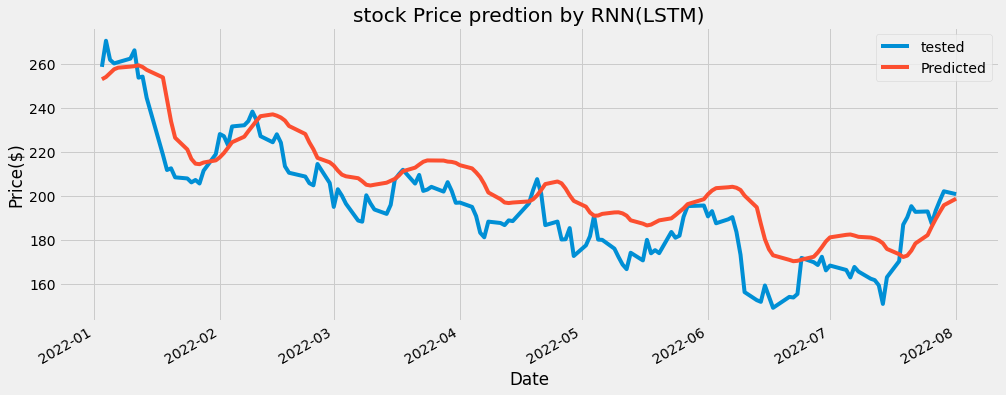

In [61]:
#Prediction visualisation
comparision[['tested','Predicted']].plot(title='stock Price predtion by RNN(LSTM)',ylabel='Price($)',figsize=(15,6));